In [1]:
#importing the required packages
from selenium.webdriver.support.ui import WebDriverWait           
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from collections import Counter
from selenium.common.exceptions import NoSuchElementException
import matplotlib.pyplot as plt

In [2]:
#starting the wweb driver session
from selenium import webdriver
driver=webdriver.Firefox()
wait = WebDriverWait(driver, 10)
driver

<selenium.webdriver.firefox.webdriver.WebDriver (session="0e603ba1-459e-43cd-9e41-5f74cf7ef59b")>

In [3]:
#function for logining in
def login(user,password):
    use=driver.find_element_by_name('username')
    use.send_keys(user)
    passw=driver.find_element_by_name('password')
    passw.send_keys(password)
    log=driver.find_element_by_tag_name('button')
    log.submit()


In [4]:
#function for searching the handles for food
def handles(str):
    food_accs=[]
    food=[]
    search=driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')
    search.clear()
    search.send_keys(str)
    time.sleep(3)
    food_accs=driver.find_elements_by_class_name('Ap253')
    for i in range(len(food_accs)):
        if food_accs[i].text[0]!='#':
            food.append(food_accs[i].text)
    return food

In [5]:
driver.get('https://www.instagram.com/')  #opening the instagram

In [8]:
login('SAMPLEUSERNAME','SAMPLEPASSWORD')  #loging in

In [9]:
#obtaining the top 10 handles
food_acc=[]
food_acc=handles('food')
print(len(food_acc))
for i in range(10):
    print(food_acc[i])

36
foodieroku07
foodrush.recipe
yourfoodlab
foodys
foodtalkindia
shillong_food_hub
food
shillongfoodblogger
foodnetwork
healthy.foodyss


## 1.Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

## a) From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [10]:
dict={}

for i in range(10):
    str=food_acc[i]
    print(str)
    driver.get('https://www.instagram.com/' + str)  #opening the profile of each handles
    numberoffollowers=driver.find_elements_by_xpath('//span[@class="g47SY "]')[1].get_attribute('title') #retrieving the number of followers
    print(numberoffollowers)
    dict[str]=numberoffollowers  #appening the number in a dictionary

print("----------------------------top five bloggers-------------------------------------")
number=[]
followuser=[]

#finding the top 5 handles with most followers
k = Counter(dict)   
high = k.most_common(5) 
for i in high:
    followuser.append(i[0])
    number.append(int(i[1].replace(',','')))
    print(i[0]," ",i[1])


foodieroku07
224
foodrush.recipe
658,885
yourfoodlab
973,652
foodys
9,577,596
foodtalkindia
293,705
shillong_food_hub
2,272
food
14,309
shillongfoodblogger
8,145
foodnetwork
10,235,262
healthy.foodyss
1,579,806
----------------------------top five bloggers-------------------------------------
yourfoodlab   973,652
foodys   9,577,596
shillongfoodblogger   8,145
foodrush.recipe   658,885
foodtalkindia   293,705


## b) Now Find the number of posts these handles have done in the previous 3 days.

In [12]:
post_dict={}
for i in followuser:
    print(i)
    driver.get('https://www.instagram.com/'+i)  #opeing each profile
    time.sleep(2)
    img_url=driver.find_element_by_class_name('_9AhH0')  #opening the first post
    img_url.click()
   
    time.sleep(2)
    
    date=wait.until(EC.presence_of_element_located((By.XPATH,'//time'))) #fetching the time of post
    date=date.text
    print(date)
    if date[len(date)-1]=='h' or date[len(date)-1]=='m' or (date[len(date)-1]=='d' and int(date[0])<=3): #checking if the time is within previous 3 days
        post_dict[i]=post_dict.get(i,0)+1  #increasing the count of posts
        next_pic=driver.find_element_by_xpath('//div[@class="DdSX2"]/a').click() #clicking the next post
   
    while True:
        date=wait.until(EC.presence_of_element_located((By.XPATH,'//time')))  #fetching the time of post
        date=date.text
        print(date)
        if date[len(date)-1]=='h' or date[len(date)-1]=='m' or (date[len(date)-1]=='d' and int(date[0])<=3):   #checking if the time is within previous 3 days
            post_dict[i]=post_dict.get(i,0)+1   #increasing the count of posts
            next_pic=driver.find_element_by_xpath('//div[@class="DdSX2"]/a[contains(@class,"coreSpriteRightPaginationArrow")]')
            next_pic.click()  #clicking the next post
            
        else:
            break
print("----------------------------top five bloggers-------------------------------------")
#initailising the handles with 0 post to 0
for i in followuser:       
    if i not in post_dict.keys():
        post_dict[i]=0
for i in post_dict:
    print(i," ",post_dict[i])

yourfoodlab
3h
22h
1d
1d
2d
2d
3d
3d
3d
4d
foodys
13h
18h
1d
1d
2d
2d
3d
3d
3d
5d
shillongfoodblogger
1d
1d
1d
2d
4d
foodrush.recipe
4w
4w
foodtalkindia
15m
1d
2d
3d
3d
4d
----------------------------top five bloggers-------------------------------------
yourfoodlab   9
foodys   9
shillongfoodblogger   4
foodtalkindia   5
foodrush.recipe   0


## c) Depict this information using a suitable graph.

In [15]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=followuser, y=number,
    mode='markers',
    marker_size=[90,90,40,5,50]   #the size of the bubble is number of posts in last 3 dyas multiplies by 10
     
)])
#fig.title("followers vs food handles")
fig.show()

The above graph is a plot between the food handles and the number of followers each handle has. The width of the bubble here depicts number of post by each handles in the past 3 days

## 2 Your friend also needs a list of hashtags that he should use in his posts.

## 1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.  2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [ ]:
#function for scraping the contents of the posts
def hashtags():
    hashtag_list=[]  #list for storing the hashtags obtained 
    
    time.sleep(1)
    caption=driver.find_elements_by_xpath('//span/a')  #scraing the contents
    for i in range(len(caption)):
        if caption[i].text[0]=='#':
            hashtag_list.append(caption[i].text[1:])  #appending the hashtags
    return hashtag_list

In [46]:
hashtag_dict={}
caption_dict={}
for i in followuser:
    print(i)
    driver.get('https://www.instagram.com/'+i)
    time.sleep(3)
    img_url=driver.find_element_by_class_name('_9AhH0')
    img_url.click()
   
    time.sleep(2)
    for i in range(10):
        hashtag_list=hashtags()
        for j in hashtag_list:
            #print(j)
            hashtag_dict[j]=hashtag_dict.get(j,0)+1
        next_pic=driver.find_element_by_xpath('//div[@class="DdSX2"]/a[contains(@class,"coreSpriteRightPaginationArrow")]')
        next_pic.click()
for i in hashtag_dict:
    print(i," ",hashtag_dict[i])

yourfoodlab
foodys
shillongfoodblogger
foodrush.recipe
foodtalkindia
StaySafe   1
StayHome   1
recipes   6
foodie   5
dhoklalove   1
sanjyotkeer   1
indiancuisine   3
indian   1
aloo   1
foodieofinstagram   2
stayhome   5
staysafe   5
quarantine   10
ContestAlert   1
EUMEStayHomeHero   2
EumeStayHomeHero   1
DoTheUndone   1
quarentine   1
foodiesofinstagram   1
streetfood   2
chaat   2
recipe   3
indianrecipes   1
ckin   1
dish   2
food   9
cuisine   8
ingredient   2
salad   2
kungpaochicken   2
meat   8
panzanella   2
produce   2
caponata   2
vegetable   2
twicecookedpork   2
chinesefood   4
salpicon   2
meal   2
tauco   2
navarin   2
sweetandsourchicken   2
lunch   2
sweetandsourpork   2
livestock   2
delicious   3
eat   2
foodpic   2
hot   2
foodporn   3
instafood   3
sweet   10
yum   2
instagood   7
photooftheday   6
photography   6
instapic   6
lockdown   9
swiggyshillong   7
coronavirus   7
shillongfoodblogger   7
foodinshillong   6
wheretohaveinshillong   6
yummy   6
eating   6


## 3.Create a csv file with two columns : the word and its frequency

In [49]:
#saving the hashtag dictionary into a csv file
import csv

with open('hash_freq.csv', 'w') as f:
    for key in hashtag_dict.keys():
        f.write("%s,%d\n"%(key,hashtag_dict[key]))

## 4.Now, find the hashtags that were most popular among these bloggers

In [50]:
from collections import Counter
hashtags=[]
count=[]
k = Counter(hashtag_dict)   #finding the top 5 hashtags
high = k.most_common(5) 
for i in high:
    hashtags.append(i[0])
    count.append(i[1])
    print(i[0]," ",i[1])
    
    

instalike   12
quarantine   10
sweet   10
foodrush   10
food   9


## 5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

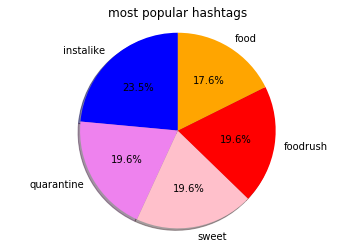

In [58]:
#piechart of top 5 most famous hashtags
import matplotlib.pyplot as plt
%matplotlib inline
color=['blue','violet','pink','red','orange']
sizes=count
plt.pie(count,colors=color,labels=hashtags,autopct='%0.1f%%', shadow=True, startangle=90)
plt.title("most popular hashtags")
plt.axis("equal")
plt.show()

## 3 You need to also calculate average followers : likes ratio for the obtained handles Followers : Likes ratio is calculated as follows:

## 1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [70]:
total_likes=[]
for i in followuser:
    print(i)
    driver.get('https://www.instagram.com/'+i)  #opening the profile
    time.sleep(3)
    img_url=driver.find_element_by_class_name('_9AhH0')  #opening the first post
    img_url.click()
   
    time.sleep(2)
    c=0
    likes=0
    while True:
        if c<10:
            str=driver.find_element_by_xpath('//button[contains(@class,"sqdOP")]/span').text  #obtainging the likes
            print(str)
            if str[0]!='V':   ##since the above statements fetches some "View replies"
                likes+=int(str.replace(',', ''))
                c+=1
            else:
                next_pic=driver.find_element_by_xpath('//div[@class="DdSX2"]/a[contains(@class,"coreSpriteRightPaginationArrow")]')
                next_pic.click()    #next post
        else:
            break
    total_likes.append(likes)

for i in total_likes:  #total likes of each handle
    print(i)
                
        

yourfoodlab
20,675
20,675
20,675
20,675
20,675
20,675
20,675
20,675
20,675
20,675
foodys
View replies (2)


NoSuchElementException: Message: Unable to locate element: //button[contains(@class,"sqdOP")]/span


## 2.Calculate the average likes for a handle.

In [ ]:
#average likes
for i in total_likes:
    total_likes.append(i/10)  #we divede it by 10 because the total post scraped were 10

## 3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [ ]:
#finding the follower tp likes ratio of each handle
follower_like=[]
for i in range(len(total_likes)):
    follower_like.append(total_likes[i]/number[i])